# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Teguh Alfian]
- **Email:** [teguhalfian01.mta@gmail.com]
- **ID Dicoding:** [Muhammad Teguh Alfian]

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbedaan jumlah penyewaan sepeda berdasarkan musim?
2. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
3. Apakah workingday/hari kerja berpengaruh terhadap jumlah penyewaan sepeda?
4. Lebih banyak mana registered user atau casual user yang menyewa sepeda?
5. Bagaimana tren bulanan penyewaan sepeda tiap tahunnya?
6. Bagaimana perbedaan jumlah penyewaan sepeda pada beberapa waktu (pagi, siang, sore, malam)?

## Import Semua Packages/Library yang Digunakan

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [70]:
#MEMASUKKAN DATASET KE DALAM DATAFRAME
df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [71]:
len(df)

17379

**Insight**:<br>
- Dataset memiliki 17379 baris dan 17 kolom

In [72]:
df = df.rename(columns={'yr':'year',
                        'mnth':'month',
                        'hum':'humidity',
                        'weathersit':'weather',
                        'cnt':'count',
                        'hr':'hour',
                        'dteday':'day date',
                        'temp':'temperature'})
df.columns

Index(['instant', 'day date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Insight:**
- Berikut merupakan penjelasan dari kolom:<br>
  - instant : Index pada record
  - day date : Tanggal
  - season : Musim<br>
  (1: Spring, 2. Summer, 3. Fall, 4. Winter)
  - year : Tahun <br>(0: 2011, 1: 2012)
  - month : Bulan <br>(1 sampai 12)
  - hour : Jam <br>(0 sampai 23)
  - holiday	: Hari Libur <br>(tanggal merah/weekend berdasarkan http://dchr.dc.gov/page/holiday-schedule)
  - weekday	: Weekday
  - workingday : Hari kerja <br>(0 jika Libur/Weekend, 1 jika selain itu)
  - weathersit : Cuaca<br>
  (1. Clear, 2. Mist Cloudy, 3. Light Snow/Rain, 4. Heavy Rain/Snow)
  - temperature	: Suhu
  - atemp	: Suhu yang dirasakan
  - humidity : Kelembapan
  - windspeed	: Kecepatan Angin
  - casual	: Pengguna Non-Registrasi
  - registered : Pengguna Teregistrasi
  - count : Jumlah Total Penyewaan Sepeda

### Assessing Data

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      17379 non-null  int64  
 1   day date     17379 non-null  object 
 2   season       17379 non-null  int64  
 3   year         17379 non-null  int64  
 4   month        17379 non-null  int64  
 5   hour         17379 non-null  int64  
 6   holiday      17379 non-null  int64  
 7   weekday      17379 non-null  int64  
 8   workingday   17379 non-null  int64  
 9   weather      17379 non-null  int64  
 10  temperature  17379 non-null  float64
 11  atemp        17379 non-null  float64
 12  humidity     17379 non-null  float64
 13  windspeed    17379 non-null  float64
 14  casual       17379 non-null  int64  
 15  registered   17379 non-null  int64  
 16  count        17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight**:<br>
- Tipe data terdiri dari float(4 kolom), int(12 kolom), dan object(1 kolom).

In [74]:
df.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [19]:
df.duplicated().sum()

0

**Insight**:<br>
- Tidak terdapat data duplikat

In [20]:
df.isnull().sum()

,0
instant,0
day date,0
season,0
year,0
month,0
hour,0
holiday,0
weekday,0
workingday,0
weather,0


**Insight**:<br>
- Tidak terdapat data kosong (null)

### Cleaning Data

In [45]:
df["day date"] = pd.to_datetime(df["day date"])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   day date     17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   year         17379 non-null  int64         
 4   month        17379 non-null  int64         
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weather      17379 non-null  int64         
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  coun

**Insight:**
- Tipe data ***day date*** berhasil diubah menjadi ***datetime***
- Sudah tidak ada tipe data ***object***

## Exploratory Data Analysis (EDA)

### Explore ...

In [77]:
df.groupby(by="season").agg({
    "count": "mean",
    "casual":"mean",
    "registered":"mean"
})

,count,casual,registered
season,,,
1,111.114569,14.290901,96.823668
2,208.344069,46.160581,162.183488
3,236.016237,50.287144,185.729093
4,198.868856,30.666824,168.202032


**Insight**:<br>
- Perbedaan musim berpengaruh pada penyewaan sepeda.
- Rata-rata penyewaan dari tertinggi ke terendah yaitu pada musim:
  - gugur/fall (3) dengan nilai 236.
  - panas/summer (2) dengan nilai 208.
  - dingin/winter (4) dengan nilai 198.
  - semi/spring (1) dengan nilai 111.

In [79]:
df.groupby(by="weather").agg({
    "count": "mean",
    "casual":"mean",
    "registered":"mean"
})

,count,casual,registered
weather,,,
1,204.869272,40.545431,164.323841
2,175.165493,29.595290,145.570202
3,111.579281,16.055673,95.523608
4,74.333333,2.666667,71.666667


**Insight**:<br>
- Cuaca mempengaruhi angka penyewaan sepeda.
- Rata-rata penyewaan dari tertinggi ke terendah yaitu pada cuaca:
  - Cerah dengan nilai rata-rata 204
  - Berkabut dengan nilai rata-rata 175
  - Hujan/salju ringan nilai rata-rata 111
  - Hujan/salju lebat nilai rata-rata 74

In [80]:
df.groupby(by="workingday").agg({
    "count": "mean",
    "casual":"mean",
    "registered":"mean"
})

,count,casual,registered
workingday,,,
0,181.405332,57.441422,123.963910
1,193.207754,25.561315,167.646439


**Insight**:<br>
- Hari kerja (1) memiliki rata-rata penyewaan sepeda lebih tinggi daripada hari libur/weekend (0)

**Insight**:<br>
- ***Registered User*** selalu lebih tinggi nilai rata-rata penyewaan sepedanya daripada ***Casual User***

## Visualization & Explanatory Analysis

### Pertanyaan 1:

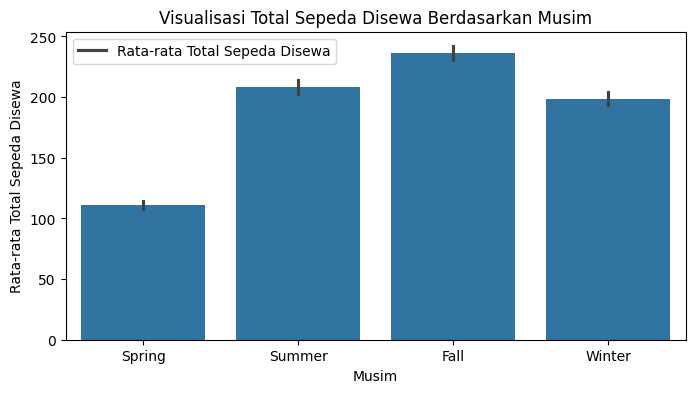

In [150]:
plt.figure(figsize=(8, 4))
sns.barplot(x='season', y='count', data=df)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Total Sepeda Disewa')
plt.title('Visualisasi Total Sepeda Disewa Berdasarkan Musim')
plt.xticks(ticks=[0,1,2,3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(labels=['Rata-rata Total Sepeda Disewa'])
plt.show()

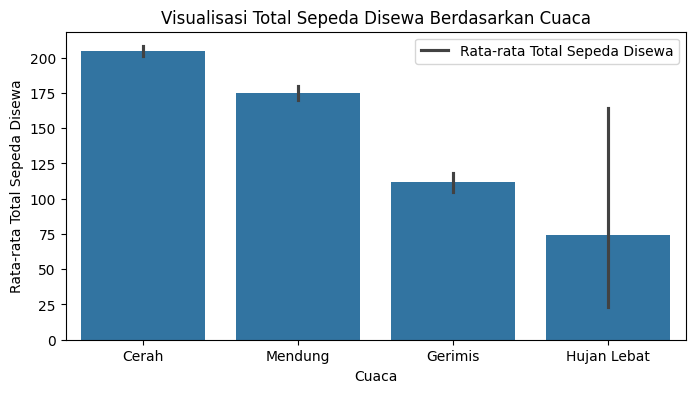

In [141]:
plt.figure(figsize=(8, 4))
sns.barplot(x='weather', y='count', data=df)
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Total Sepeda Disewa')
plt.title('Visualisasi Total Sepeda Disewa Berdasarkan Cuaca')
plt.xticks(ticks=[0,1,2,3], labels=['Cerah', 'Mendung', 'Gerimis', 'Hujan Lebat'])
plt.legend(labels=['Rata-rata Total Sepeda Disewa'])
plt.show()

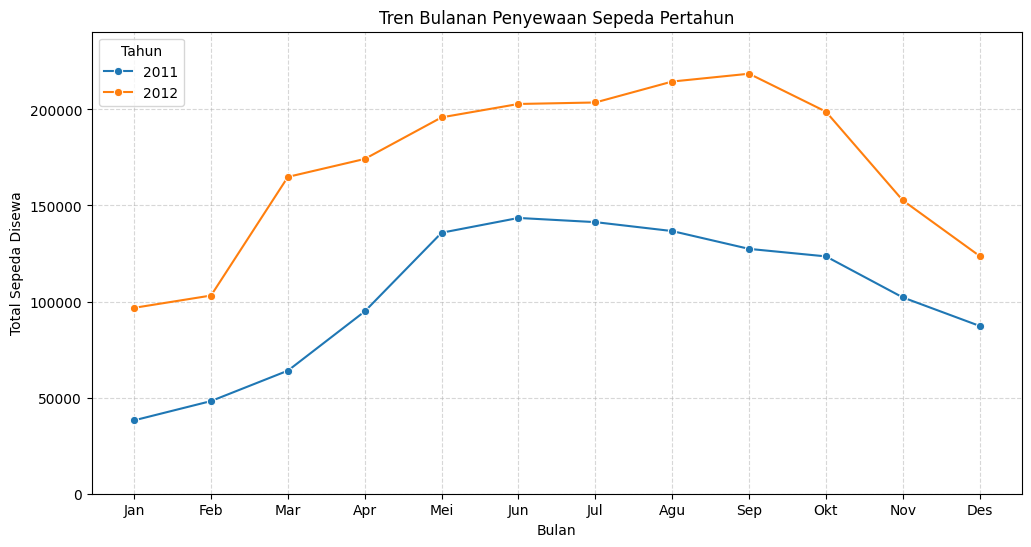

In [147]:
monthly_trend = df.groupby(['year', 'month'])['count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', hue='year', data=monthly_trend, marker='o')

plt.xlabel('Bulan')
plt.ylabel('Total Sepeda Disewa')
plt.title('Tren Bulanan Penyewaan Sepeda Pertahun')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

plt.ylim(0, monthly_trend['count'].max() * 1.1)

handles, labels = plt.gca().get_legend_handles_labels()
labels = ['2011' if label == '0' else '2012' for label in labels]
plt.legend(handles, labels, title='Tahun', loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Pertanyaan 2:

In [139]:
def assign_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 16:
        return 'Siang'
    elif 16 <= hour < 20:
        return 'Sore'
    else:
        return 'Malam'

df['waktu'] = df['hour'].apply(assign_time_of_day)

**Insight**:<br>
- Terdapat empat bagian waktu yaitu pagi, siang, sore, dan malam

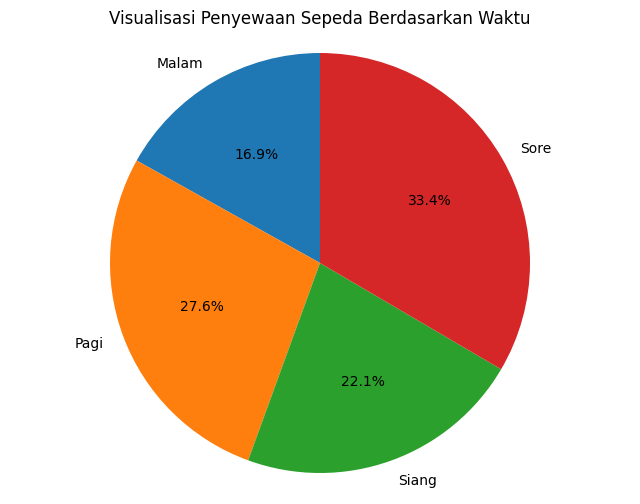

In [140]:
time_of_day_counts = df.groupby('waktu')['count'].sum()

plt.figure(figsize=(8, 6))
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Visualisasi Penyewaan Sepeda Berdasarkan Waktu')
plt.axis('equal')

plt.show()


**Insight:**
- Jumlah penyewaan tertinggi yaitu pada sore hari dengan persentase 33.4%
- Jumlah penyewaan terendah yaitu pada malam hari dengan persentase 16.9%

## Analisis Lanjutan (Opsional)

## Conclusion

1. Perbedaan musim berpengaruh terhadap jumlah penyewaan sepeda. Musim gugur memiliki rata-rata total penyewaan sepeda tertinggi, sedangkan musim dingin sebaliknya, dengan rata-rata penyewaan terendah.<br>
2. Cuaca memengaruhi jumlah penyewaan sepeda. Cuaca cerah memiliki rata-rata penyewaan tertinggi, sementara cuaca hujan atau salju lebat memiliki rata-rata penyewaan terendah.<br>
3. Jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur atau akhir pekan.<br>
4. Pengguna terdaftar (registered user) lebih banyak menyewa sepeda dibandingkan dengan pengguna biasa (casual user). <br>
5. Tren bulanan penyewaan sepeda:<br>
    - Tahun 2011: Januari hingga Juni mengalami peningkatan jumlah penyewaan, sedangkan Juli hingga Desember mengalami penurunan secara perlahan.<br>
    - Tahun 2012: Januari hingga September mengalami peningkatan jumlah penyewaan, dengan lonjakan tajam dari Februari ke Maret. Sementara itu, Oktober hingga Desember mengalami penurunan bertahap.<br>
6. Waktu berpengaruh terhadap penyewaan sepeda. Jumlah penyewaan tertinggi terjadi pada sore hari, sedangkan jumlah penyewaan terendah terjadi pada malam hari.

In [148]:
pip freeze > requirements.txt